In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("creditcard.csv/creditcard.csv")

In [3]:
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Check the class distribution (fraud vs non-fraud)
print(df['Class'].value_counts())
print(df.describe())


Class
0    284315
1       492
Name: count, dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.

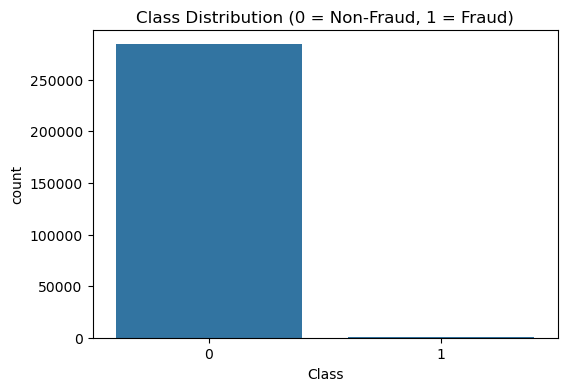

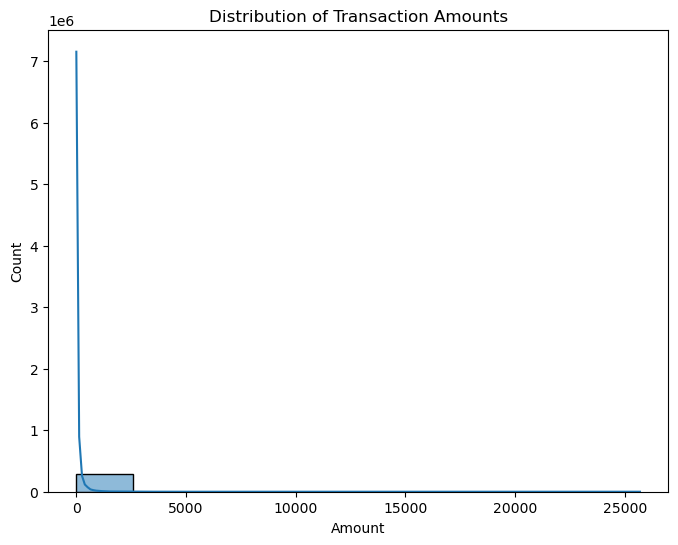

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()

# Plot the distribution of transaction amounts
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=10, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the 'Amount' column
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Scale the 'V1' to 'V28' columns
df_scaled = df.copy()
df_scaled.iloc[:, 1:29] = scaler.fit_transform(df.iloc[:, 1:29])

# Check the first few rows after scaling
print(df_scaled.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1   0.0  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2   1.0 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3   1.0 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4   2.0 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507  0.246585   
1  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131  0.320694   
2  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092 -0.628537   
3  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027  1.241904   
4 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250 -0.395202   

        V26       V27       V28 

In [8]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop(columns=['Class'])  
y = df_scaled['Class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (227845, 30), Testing Set: (56962, 30)


In [9]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9896
Precision: 0.1315
Recall: 0.8980
F1 Score: 0.2295

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Display full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Credit Card Fraud Detection")
plt.show()